### I will use :
- KNN 
- Decision Trees
- Logistic Regression
- SVM :
    - poly
    - linear
    - sigmoid
    - rbf

#### add primary imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


#### Load csv

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

#### Grouped the data to X and Y


In [4]:
feature_df = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng' , 'oldpeak', "slp" ,  'caa', 'thall']]
X = np.asarray(feature_df)
print(X[0:5])



y = np.asarray(df['output'])
print(y[0:5])

[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]
[1 1 1 1 1]


#### Train/Test dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


#### <span style="color: red;">KNN modeling : 
- #### use all parameters to prediction :

In [6]:
Ks = 100                                               
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))


for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


The best accuracy was with 0.7377049180327869 with k= 31


#### add a magic loop to find the best parameters :

In [ ]:
import itertools

best_accuracy = 0
best_features = None
best_k = None

# create a list of all feature combinations
feature_combinations = []
for r in range(1, len(df.columns)-1):
    feature_combinations.extend(itertools.combinations(df.columns[:-1], r))

# loop through all feature combinations
for features in feature_combinations:
    feature_df = df[list(features)]
    XX = np.asarray(feature_df)
    yy = np.asarray(df['output'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    Ks = 50
    mean_acc = np.zeros((Ks-1))

    for n in range(1, Ks):
        # Train Model and Predict
        neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
        yhat = neigh.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    # print(f"Features: {features}\nBest accuracy: {mean_acc.max()} with k={mean_acc.argmax()+1}\n")

    # check if this feature subset is the best so far
    if mean_acc.max() > best_accuracy:
        best_accuracy = mean_acc.max()
        best_features = features
        best_k = mean_acc.argmax() + 1
        print(f"Features: {features}\nBest accuracy: {mean_acc.max()} with k={mean_acc.argmax()+1}\n")
        
        
print(f"Best feature subset: {best_features}\nBest accuracy: {best_accuracy} with k={best_k}")


# output ------------------------------------------------ 
# Features: ('age',)
# Best accuracy: 0.639344262295082 with k=52

# Features: ('cp',)
# Best accuracy: 0.8032786885245902 with k=3

# Features: ('cp', 'restecg')
# Best accuracy: 0.819672131147541 with k=28

# Features: ('cp', 'oldpeak')
# Best accuracy: 0.8360655737704918 with k=13

# Features: ('exng', 'caa')
# Best accuracy: 0.8688524590163934 with k=7

# Features: ('cp', 'exng', 'caa')
# Best accuracy: 0.9016393442622951 with k=20

# Features: ('cp', 'oldpeak', 'caa', 'thall')
# Best accuracy: 0.9180327868852459 with k=20

# Features: ('sex', 'cp', 'exng', 'oldpeak', 'slp', 'caa', 'thall')
# Best accuracy: 0.9344262295081968 with k=5

# Best feature subset: ('sex', 'cp', 'exng', 'oldpeak', 'slp', 'caa', 'thall')
# Best accuracy: 0.9344262295081968 with k=5


##### I find the best feature now time to fit :

In [10]:
feature = df[['sex', 'cp', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
X_train, X_test, y_train, y_test = train_test_split( feature, y, test_size=0.2, random_state=4)


Ks = 5                                               
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

 
neigh = KNeighborsClassifier(n_neighbors = Ks).fit(X_train,y_train)
yhat=neigh.predict(X_test)
mean_acc[Ks-2] = metrics.accuracy_score(y_test, yhat)
std_acc[Ks-2]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9344262295081968 with k= 4


##### time to test for real parameters :

In [11]:
real_parameters = [[1,2,0,0.5,2,0,3]]
feature_names = ['sex', 'cp', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
real_parameters_with_names = pd.DataFrame(real_parameters, columns=feature_names)
neigh.predict(real_parameters_with_names)

array([1], dtype=int64)

#### <span style="color: red;">decision tree modeling : 
- use all parameters to prediction :


In [12]:
feature_df = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng' , 'oldpeak', "slp" ,  'caa', 'thall']]
X = np.asarray(feature_df)
y = np.asarray(df['output'])

X_train_Tree, X_test_Tree, y_train_Tree, y_test_Tree = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_Tree.shape,  X_train_Tree.shape)
print ('Test set:', X_test_Tree.shape,  y_test_Tree.shape)

Train set: (242, 13) (242, 13)
Test set: (61, 13) (61,)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


heartTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
heartTree.fit(X_train_Tree,y_train_Tree)
predTree = heartTree.predict(X_test_Tree)
print("Accuracy: ", metrics.accuracy_score(y_test_Tree, predTree))


Accuracy:  0.8524590163934426


#### Add a magic loop to find the best parameters :

In [ ]:
import itertools

best_accuracy = 0
best_features = None
best_n = None

# create a list of all feature combinations
feature_combinations = []
for r in range(1, len(df.columns)-1):
    feature_combinations.extend(itertools.combinations(df.columns[:-1], r))



# loop through all feature combinations
for features in feature_combinations:
    feature_df = df[list(features)]
    XX = np.asarray(feature_df)
    yy = np.asarray(df['output'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    for n in range (1,10) :
        heartTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
        heartTree.fit(X_train,y_train)
        predTree = heartTree.predict(X_test)
    
    # check if this feature subset is the best so far
        if metrics.accuracy_score(y_test, predTree) > best_accuracy:
            best_accuracy = metrics.accuracy_score(y_test, predTree)
            best_features = features
            best_n = n
            print("Accuracy: ", metrics.accuracy_score(y_test, predTree) , "feature :", best_features , best_n)        
        
        
print("Best Accuracy: ", best_accuracy , "best feature :", best_features , best_n)   



# output -----------------------------------------------------------------------------------------------
# Accuracy:  0.5901639344262295 feature : ('age',) 1
# Accuracy:  0.8032786885245902 feature : ('cp',) 1
# Accuracy:  0.819672131147541 feature : ('cp', 'thalachh') 3
# Accuracy:  0.8524590163934426 feature : ('exng', 'caa') 2
# Accuracy:  0.8688524590163934 feature : ('exng', 'caa') 3
# Accuracy:  0.9016393442622951 feature : ('cp', 'caa', 'thall') 4
# Accuracy:  0.9180327868852459 feature : ('cp', 'exng', 'slp', 'caa', 'thall') 7
# Accuracy:  0.9344262295081968 feature : ('cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall') 7
# Best Accuracy:  0.9344262295081968 best feature : ('cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall') 7    



#### <span style="color: red;">Logistic Regression : 
- preprocessing :

In [21]:
feature_df = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng' , 'oldpeak', "slp" ,  'caa', 'thall']]
X = np.asarray(feature_df)
y = np.asarray(df['output'])

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_LR.shape,  y_train_LR.shape)
print ('Test set:', X_test_LR.shape,  y_test_LR.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


#### Modeling :

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_LR,y_train_LR)
LR

LogisticRegression(C=0.01, solver='liblinear')

#### predict Time :

In [24]:
yhat_LR = LR.predict(X_test)
print(yhat_LR)
print(y_test_LR)

# predict_proba 
yhat_prob = LR.predict_proba(X_test)
yhat_prob

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]


array([[0.24147448, 0.75852552],
       [0.69218888, 0.30781112],
       [0.39163558, 0.60836442],
       [0.1233538 , 0.8766462 ],
       [0.35899742, 0.64100258],
       [0.45386182, 0.54613818],
       [0.4929031 , 0.5070969 ],
       [0.11384778, 0.88615222],
       [0.3159304 , 0.6840696 ],
       [0.19627002, 0.80372998],
       [0.25148238, 0.74851762],
       [0.1056052 , 0.8943948 ],
       [0.44706037, 0.55293963],
       [0.41318617, 0.58681383],
       [0.40155536, 0.59844464],
       [0.87379089, 0.12620911],
       [0.27952687, 0.72047313],
       [0.21809055, 0.78190945],
       [0.54134364, 0.45865636],
       [0.35666152, 0.64333848],
       [0.14608802, 0.85391198],
       [0.26229681, 0.73770319],
       [0.80352779, 0.19647221],
       [0.46495612, 0.53504388],
       [0.34435255, 0.65564745],
       [0.69471404, 0.30528596],
       [0.66385902, 0.33614098],
       [0.28792839, 0.71207161],
       [0.36592698, 0.63407302],
       [0.71059579, 0.28940421],
       [0.

#### Evaluation ( jaccard index and log loss )

In [30]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print( "Correct prediction percentage of people who want to leave : ", jaccard_score(y_test, yhat,pos_label=1))   
print( "Correct prediction percentage of people who want to stay  : ", jaccard_score(y_test, yhat,pos_label=0))     


log_loss(y_test_LR, yhat_prob)

Correct prediction percentage of people who want to leave :  0.8947368421052632
Correct prediction percentage of people who want to stay  :  0.8518518518518519


0.4335616990946169

#### confusion matrix

Confusion matrix, without normalization


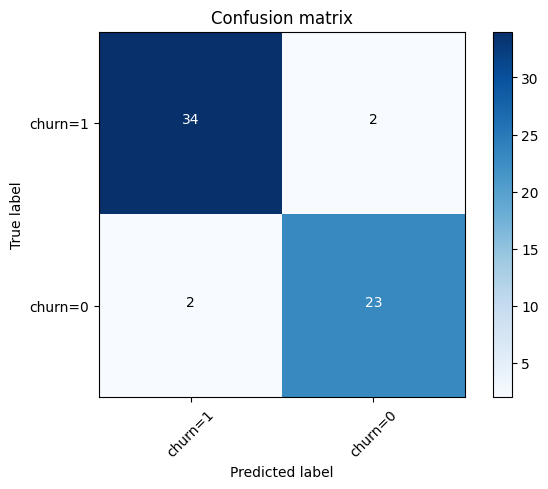

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# print(confusion_matrix(y_test, yhat, labels=[1,0]))
# print (classification_report(y_test, yhat))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

